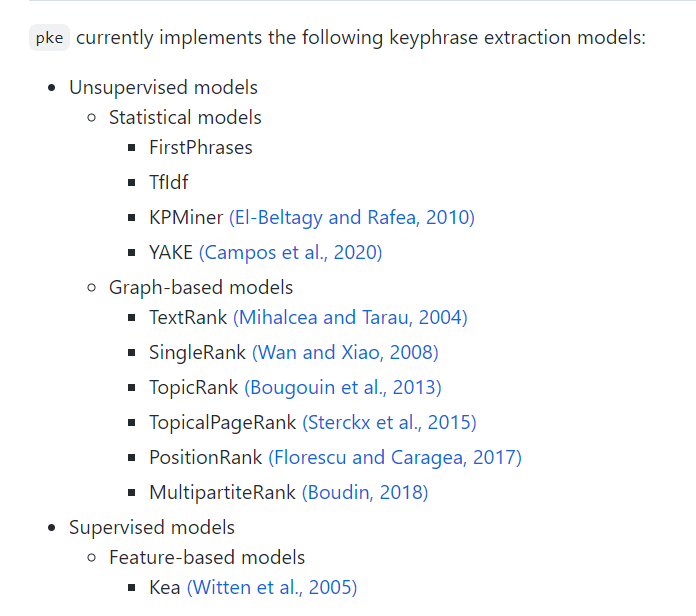

https://www.kaggle.com/code/akhatova/extract-keywords#Conclusion

duzo metod jest tutaj

In [ ]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
!pip install coreferee
!coreferee install pl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 KB 6.9 MB/s eta 0:00:00
/bin/bash: coreferee: command not found


In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U pip setuptools wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 22.0.4
    Uninstalling pip-22.0.4:
      Successfully uninstalled pip-22.0.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
cvxpy 1.2.3 requires setuptools<=64.0.2, but you have setuptools 66.0.0 which is incompatible.


In [ ]:
!python -m spacy download pl_core_news_lg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 573.6/573.6 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_lg')


In [ ]:
import coreferee, spacy
from spacy import displacy
import numpy as np
import pandas as pd
import sklearn
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt
%matplotlib inline

nlp = spacy.load("pl_core_news_lg")

In [ ]:
df =pd.read_csv("/content/processed_dataset_12_11_2021.csv")

In [ ]:
df.dropna(inplace=True)

In [ ]:
len(df)

2719

In [ ]:
df['categories'][5]

'114 Rzeczowe, 187 Inne - praw podatkowe'

text_full, categories

In [ ]:
df.head(100)

,Unnamed: 0,categories,text,text_full,main_category,label_mid,label_high
0,0,114 Rzeczowe,['czy wspólnota mieszkaniowa może podjąć uchwa...,czy wspólnota mieszkaniowa może podjąć uchwałę...,rzeczowe,rzeczowe,prawo cywilne
1,1,114 Rzeczowe,['czy wspólnota mieszkaniowa może odzyskać pom...,czy wspólnota mieszkaniowa może odzyskać pomie...,rzeczowe,rzeczowe,prawo cywilne
2,3,15 Prawo ochrony danych osobowych,['czy uprawnienie mieszkańców wspólnoty mieszk...,czy uprawnienie mieszkańców wspólnoty mieszkan...,prawo ochrony danych osobowych,prawo administracyjne materialne,prawo administracyjne
3,4,"20 Prawo budowlane, 114 Rzeczowe",['czy budowa windy dla osób niepełnosprawnych ...,czy budowa windy dla osób niepełnosprawnych mo...,prawo budowlane,prawo administracyjne materialne,prawo administracyjne
4,5,114 Rzeczowe,['jakie czynności powinna podjąć wspólnota mie...,jakie czynności powinna podjąć wspólnota miesz...,rzeczowe,rzeczowe,prawo cywilne
...,...,...,...,...,...,...,...
95,152,109 Inne - praw pracy,['czy dysponent zakładowego funduszu świadczeń...,czy dysponent zakładowego funduszu świadczeń s...,inne praw pracy,inne praw pracy,prawo pracy
96,153,59 Ustawa Prawo farmaceutyczne,['czy farmaceuta z apteki szpitalnej może zost...,czy farmaceuta z apteki szpitalnej może zostać...,ustawa prawo farmaceutyczne,ustawa prawo farmaceutyczne,prawo farmaceutyczne
97,154,91 Ustawa Kodeks pracy,['czy możliwa jest zmiana przez pracodawcę wyz...,czy możliwa jest zmiana przez pracodawcę wyzna...,ustawa kodeks pracy,ustawa kodeks pracy,prawo pracy
98,157,143 VAT,['w jaki sposób klientka powinna udokumentować...,w jaki sposób klientka powinna udokumentować s...,vat,podatki poĺrednie,prawo podatkowe


In [ ]:
df['categories'].unique()

array(['114 Rzeczowe', '15 Prawo ochrony danych osobowych',
       '20 Prawo budowlane, 114 Rzeczowe',
       '114 Rzeczowe, 187 Inne - praw podatkowe',
       '112 Prawo cywilne procesowe, 116 Spadkowe', '20 Prawo budowlane',
       '16 Prawo drogowe', '112 Prawo cywilne procesowe',
       '20 Prawo budowlane, 69 Prawo karne procesowe, 74 Ustawa Kodeks karny, 112 Prawo cywilne procesowe, 114 Rzeczowe',
       '39 Prawo finansowe, 193 Prawo Unii Europejskiej',
       '112 Prawo cywilne procesowe, 114 Rzeczowe',
       '59 Ustawa Prawo farmaceutyczne, 197 Inne - praw farmaceutyczne',
       '91 Ustawa Kodeks pracy, 109 Inne - praw pracy',
       '79 Ustawa o zawodach lekarza i lekarza dentysty',
       '109 Inne - praw pracy', '91 Ustawa Kodeks pracy',
       '114 Rzeczowe, 117 Rodzinne i opiekuńcze', '116 Spadkowe',
       '79 Ustawa o zawodach lekarza i lekarza dentysty, 81 Ustawa o zawodach pielęgniarki i położnej, 179 Ustawa o izbach aptekarskich',
       '79 Ustawa o zawodach lekar

In [ ]:
df['label_high'].unique()

array(['prawo cywilne', 'prawo administracyjne', 'prawo farmaceutyczne',
       'prawo pracy', 'prawo medyczne', 'prawo karne',
       'prawo miädzynarodowe', 'prawo podatkowe', 'prawo konstytucyjne',
       'odpowiedzi niestandardowe', 'tu interpolska'], dtype=object)

In [ ]:
# Get the count of each value
value_counts = df['categories'].value_counts()

# Select the values where the count is less than 3 (or 5 if you like)
to_remove = value_counts[value_counts <= 20].index

# Keep rows where the city column is not in to_remove
df = df[~df.categories.isin(to_remove)]

In [ ]:
df['categories'].value_counts()

91 Ustawa Kodeks pracy                                                                                          320
114 Rzeczowe                                                                                                    158
164 COVID-19                                                                                                    139
89 Inne - praw medyczne                                                                                          94
59 Ustawa Prawo farmaceutyczne                                                                                   92
79 Ustawa o zawodach lekarza i lekarza dentysty                                                                  79
169 Dodatek COVID-19                                                                                             69
112 Prawo cywilne procesowe                                                                                      69
79 Ustawa o zawodach lekarza i lekarza dentysty, 91 Ustawa Kodeks pracy 

In [ ]:
text_full = ' '.join([str(row) for row in df['text_full']])
doc=text_full

In [ ]:
 #doc = nlp(text_full)

In [ ]:
series = df['text_full']
count = series.str.count("jaki sposób")
count.sum()


122

In [ ]:
print(df['categories'][2])

15 Prawo ochrony danych osobowych


In [ ]:

# nasz tekst to doc

In [ ]:
print(len(doc))

237810


In [ ]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 72.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 92.2 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23778 sha256=cb6cc623d5088d1643dbbb6ef10b2b766f159a3a1b18053f318e5e7c2873c2c9
  Stored in directory: /root/.cache/pip/wheels/44/5f/14/7d63eeb355b1d69553ffb45ad33783042c2fe0c92d9f7f2bd5
 

In [ ]:
from keybert import KeyBERT
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

print(keywords)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

[('współżycia', 0.5197), ('wysyłkową', 0.4852), ('wyłudzenia', 0.4832), ('współpracować', 0.4832), ('wysyłkowo', 0.4801)]


In [ ]:
df_weights = pd.DataFrame(keywords)
df_weights.rename(columns={0:'sentence_from_keyword',1:'weights'},inplace=True)
print(df_weights)

  sentence_from_keyword  weights
0            współżycia   0.5197
1             wysyłkową   0.4852
2            wyłudzenia   0.4832
3         współpracować   0.4832
4             wysyłkowo   0.4801


In [ ]:
print(type(keywords))
lista_keywords = []
for i in range(len(keywords)):
    #print(keywords[i][0])
    #print(type(keywords[i][0]))
    lista_keywords.append(keywords[i][0])

<class 'list'>


In [ ]:
cols = ['keyword','sentence_from_keyword','type_of_law']

list1=[]

for i in range(len(lista_keywords)):
    contain_values = df[df['text_full'].str.contains(lista_keywords[i])]
    lists_with_indexes = list(contain_values.index.values)
    print(lists_with_indexes)
    counter = len(lists_with_indexes)
    if counter ==0:
        continue
    else:
        for k in range(counter):
            keyword = "KeyBERT"
            sentence_from_keyword = lista_keywords[i]
            type_of_law = df['label_high'][lists_with_indexes[k]]
            list1.append([keyword,sentence_from_keyword,type_of_law])

DF1 = pd.DataFrame(list1,columns=cols)
DF1 = DF1.merge(df_weights,on='sentence_from_keyword')
DF1.to_csv('DF1.csv', index=False)
print(DF1)

[67]
[1754]
[1956]
[403, 1104, 1183]
[2383]
   keyword sentence_from_keyword           type_of_law  weights
0  KeyBERT            współżycia         prawo cywilne   0.5197
1  KeyBERT             wysyłkową  prawo farmaceutyczne   0.4852
2  KeyBERT            wyłudzenia         prawo cywilne   0.4832
3  KeyBERT         współpracować        prawo medyczne   0.4832
4  KeyBERT         współpracować       prawo podatkowe   0.4832
5  KeyBERT         współpracować       prawo podatkowe   0.4832
6  KeyBERT             wysyłkowo  prawo farmaceutyczne   0.4801


In [ ]:
DF1_edit = DF1.drop('keyword', axis=1)
print(DF1_edit)
DF1_edit.to_csv('DF1_edit.csv', index=False)

  sentence_from_keyword           type_of_law  weights
0            współżycia         prawo cywilne   0.5197
1             wysyłkową  prawo farmaceutyczne   0.4852
2            wyłudzenia         prawo cywilne   0.4832
3         współpracować        prawo medyczne   0.4832
4         współpracować       prawo podatkowe   0.4832
5         współpracować       prawo podatkowe   0.4832
6             wysyłkowo  prawo farmaceutyczne   0.4801


In [ ]:
pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for jellyfish: filename=jellyfish-0.9.0-cp38-cp38-linux_x86_64.whl size=74702 sha256=48459a9f0f259023ea9bc52755fe152ad2a7d712877c0e4bfd87fdf604d25052
  Stored in directory: /root/.cache/pip/wheels/0b/ca/cd/76ef5e7b99a27c1323a1c4f488b7f2e5b6cbb02f255a396282
Successfully built jellyfish


In [ ]:
import yake

kw_extractor = yake.KeywordExtractor()
yake_keywords = kw_extractor.extract_keywords(doc)
print(yake_keywords)
print(len(yake_keywords))

[('czy klientka może', 2.333205718539083e-09), ('czy klient może', 3.502056880043365e-09), ('czy pracodawca może', 5.085983234943039e-09), ('czy klient jest', 4.5440786405432487e-08), ('sposób klientka może', 5.111357576593491e-08), ('czy klientka powinna', 5.2883940686320773e-08), ('pracy czy klientka', 7.123490235600349e-08), ('czy klientka musi', 7.184478791019308e-08), ('czy klientka jest', 7.673130293699982e-08), ('pracy czy klient', 7.909818901310101e-08), ('sposób klient może', 8.981293180286107e-08), ('jaki sposób klientka', 9.312838216279218e-08), ('czy klient powinien', 9.778366783831256e-08), ('czy apteka może', 1.0629604945416478e-07), ('czy lekarz może', 1.0732304458417842e-07), ('czy klientka będzie', 1.1194440118107513e-07), ('klientka czy klientka', 1.1876283335467205e-07), ('pracy czy pracodawca', 1.2987509036467008e-07), ('czy klient będzie', 1.4206235935443005e-07), ('czy wspólnota może', 1.4209344040700154e-07)]
20


In [ ]:
df_yake_keywords = pd.DataFrame(yake_keywords)
df_yake_keywords.rename(columns={0:'sentence_from_keyword',1:'weights'},inplace=True)
print(df_yake_keywords)

    sentence_from_keyword       weights
0       czy klientka może  2.333206e-09
1         czy klient może  3.502057e-09
2     czy pracodawca może  5.085983e-09
3         czy klient jest  4.544079e-08
4    sposób klientka może  5.111358e-08
5    czy klientka powinna  5.288394e-08
6      pracy czy klientka  7.123490e-08
7       czy klientka musi  7.184479e-08
8       czy klientka jest  7.673130e-08
9        pracy czy klient  7.909819e-08
10     sposób klient może  8.981293e-08
11   jaki sposób klientka  9.312838e-08
12    czy klient powinien  9.778367e-08
13        czy apteka może  1.062960e-07
14        czy lekarz może  1.073230e-07
15    czy klientka będzie  1.119444e-07
16  klientka czy klientka  1.187628e-07
17   pracy czy pracodawca  1.298751e-07
18      czy klient będzie  1.420624e-07
19     czy wspólnota może  1.420934e-07


In [ ]:

print(type(yake_keywords))
lista_keywords = []
for i in range(len(yake_keywords)):
    #print(keywords[i][0])
    #print(type(keywords[i][0]))
    lista_keywords.append(yake_keywords[i][0])

cols = ['keyword','sentence_from_keyword','type_of_law']

list1=[]

for i in range(len(lista_keywords)):
    contain_values = df[df['text_full'].str.contains(lista_keywords[i])]
    lists_with_indexes = list(contain_values.index.values)
    print(lists_with_indexes)
    counter = len(lists_with_indexes)
    if counter ==0:
        continue
    else:
        for k in range(counter):
            keyword = "yake"
            sentence_from_keyword = lista_keywords[i]
            type_of_law = df['label_high'][lists_with_indexes[k]]
            list1.append([keyword,sentence_from_keyword,type_of_law])

DF2 = pd.DataFrame(list1,columns=cols)
DF2 = DF2.merge(df_yake_keywords,on='sentence_from_keyword')
DF2.to_csv('DF2.csv', index=False)
print(DF2)

<class 'list'>
[218, 225, 232, 253, 257, 264, 283, 315, 328, 338, 339, 352, 357, 381, 441, 457, 499, 606, 619, 626, 629, 641, 675, 767, 772, 811, 827, 834, 888, 899, 931, 959, 974, 985, 1030, 1065, 1086, 1087, 1104, 1111, 1117, 1132, 1154, 1183, 1216, 1250, 1252, 1315, 1317, 1385, 1404, 1420, 1440, 1465, 1470, 1474, 1485, 1490, 1519, 1523, 1532, 1567, 1595, 1621, 1693, 1700, 1716, 1722, 1742, 1754, 1760, 1771, 1857, 1946, 2003, 2036, 2051, 2067, 2109, 2111, 2137, 2188, 2204, 2216, 2225, 2231, 2237, 2279, 2311, 2335, 2342, 2357, 2390, 2396, 2404, 2441, 2467, 2503, 2550, 2579, 2581, 2607, 2642, 2652, 2683, 2686, 2689, 2698, 2713]
[111, 133, 144, 148, 161, 222, 256, 260, 269, 310, 311, 330, 334, 362, 363, 365, 473, 481, 483, 487, 495, 500, 530, 575, 594, 609, 667, 669, 705, 795, 802, 803, 813, 820, 821, 823, 841, 842, 853, 905, 907, 967, 995, 1001, 1049, 1134, 1158, 1159, 1191, 1200, 1234, 1248, 1268, 1269, 1274, 1296, 1348, 1398, 1415, 1472, 1549, 1591, 1673, 1710, 1750, 1753, 1781, 1807

In [ ]:
DF2_edit = DF2.drop('keyword', axis=1)
print(DF2_edit)
DF2_edit.to_csv('DF2_edit.csv', index=False)

    sentence_from_keyword     type_of_law       weights
0       czy klientka może  prawo medyczne  2.333206e-09
1       czy klientka może     prawo pracy  2.333206e-09
2       czy klientka może  prawo medyczne  2.333206e-09
3       czy klientka może  prawo medyczne  2.333206e-09
4       czy klientka może  prawo medyczne  2.333206e-09
..                    ...             ...           ...
457    czy wspólnota może   prawo cywilne  1.420934e-07
458    czy wspólnota może   prawo cywilne  1.420934e-07
459    czy wspólnota może  prawo medyczne  1.420934e-07
460    czy wspólnota może   prawo cywilne  1.420934e-07
461    czy wspólnota może   prawo cywilne  1.420934e-07

[462 rows x 3 columns]


In [ ]:
new = DF2_edit.drop_duplicates(subset=['weights'])
print(new)

    sentence_from_keyword            type_of_law       weights
0       czy klientka może         prawo medyczne  2.333206e-09
109       czy klient może         prawo medyczne  3.502057e-09
198   czy pracodawca może            prawo pracy  5.085983e-09
278       czy klient jest            prawo pracy  4.544079e-08
292  sposób klientka może         prawo medyczne  5.111358e-08
309  czy klientka powinna        prawo podatkowe  5.288394e-08
329    pracy czy klientka         prawo medyczne  7.123490e-08
331     czy klientka musi          prawo cywilne  7.184479e-08
346     czy klientka jest          prawo cywilne  7.673130e-08
353      pracy czy klient            prawo pracy  7.909819e-08
358    sposób klient może          prawo cywilne  8.981293e-08
371  jaki sposób klientka        prawo podatkowe  9.312838e-08
399   czy klient powinien         prawo medyczne  9.778367e-08
413       czy apteka może   prawo farmaceutyczne  1.062960e-07
426       czy lekarz może            prawo pracy  1.073

In [ ]:
!pip install rake_nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rake_nltk import Rake
#wczytywanie polskich stopwords 
stopwords_pl = 'stopwords_pl.txt'
import nltk
nltk.download('stopwords')
nltk.download('punkt')
r = Rake()
r.extract_keywords_from_text(text_full)
for rating, keyword in r.get_ranked_phrases_with_scores():
  if rating > 5000:
    print(rating, keyword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


10101.303820635982 obowiązek przechowywać odpady medyczne po szczepieniu w lodówce jak długo apteka powinna przechowywać takie odpady czy wymagany letni staż należy liczyć w ten sposób że wystarczy przepracować lata niezależnie od wielkości etatu w jaki sposób klientka może odrzucić spadek jakie będą zasady wystawiania recept papierowych od lipca r gdzie klientka może nabyć druki recept według nowego wzoru czy w przypadku podważenia testamentu z r zacznie ponownie obowiązywać testament sporządzony w r czy można podważyć testament po otwarciu spadku czy po otwarciu spadku dzieci spadkodawcy mogą domagać się dodatkowego świadczenia oprócz zachowku czy można odczytać testament jeżeli jeden z spadkobiorców nie chce się stawić czy po powrocie któryś z członków rodziny może zostać objęty kwarantanną kto powinien ponieść koszty remontu balkonów w budynku wspólnoty mieszkaniowej czy konieczność używania nowych druków recept od lipca r dotyczy również lekarzy radiologów którzy wypisują recepty 

In [ ]:
!pip install multi-rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp38-cp38-linux_x86_64.whl size=9832898 sha256=1c3718a4ab1657243eaf95288c09498a94bde731344d751f5bbbecae9fb5ab4b
  Stored in directory: /root/.cache/pip/wheels/c9/a2/c7/452762ff1f5c4d3a4b59beb0181ba24a8a1ad5846fbcd95132
Successfully built pycld2


In [ ]:
from multi_rake import Rake
#wczytywanie polskich stopwords 
stopwords_pl = 'stopwords_pl.txt'
rake = Rake(
    min_chars=3,
    max_words=2,
    min_freq=1,
    language_code='pl',  # 'en'
    stopwords=stopwords_pl,  # {'and', 'of'}
    lang_detect_threshold=50,
    max_words_unknown_lang=2,
    generated_stopwords_percentile=80,
    generated_stopwords_max_len=3,
    generated_stopwords_min_freq=2,
)

keywords = rake.apply(
    text_full,
    text_for_stopwords=stopwords_pl,
)

multi_rake_keywords=keywords
print(multi_rake_keywords)

[('powierzchni m', 4.0), ('samo przewinienie', 4.0), ('dawkach dziennych', 4.0), ('godzinach nadliczbowych', 4.0), ('jaki sposób', 4.0), ('których mowa', 4.0), ('której mowa', 4.0), ('którym mowa', 4.0), ('rozwiązaniu umowy', 4.0), ('miesiącu lipcu', 4.0), ('wymiarze dni', 4.0), ('kształcie litery', 4.0), ('hotelu pracownikom', 4.0), ('spadku przypadnie', 4.0), ('wartości spadku', 4.0), ('aktu notarialnego', 4.0), ('samodzielnej pracy', 4.0), ('jest oddelegowaniem', 4.0), ('formie oddelegowania', 4.0), ('odbywaniu dyżurów', 4.0), ('charakterze świadka', 4.0), ('innym oddziale', 4.0), ('wykreślenie wpisu', 4.0), ('tygodniu pracująca', 4.0), ('co dalej', 4.0), ('trakcie pracy', 4.0), ('miejscu wskazanym', 4.0), ('sądzie wniosek', 4.0), ('podmiocie zewnętrznym', 4.0), ('wypowiedzeniu umowy', 4.0), ('trakcie postępowania', 4.0), ('wypowiedzenie umowy', 4.0), ('niepodjęciu leczenia', 4.0), ('ramach której', 4.0), ('ustalonych dniachgodzinach', 4.0), ('zaistniałej sytuacji', 4.0), ('innych m

In [ ]:
df_multi_rake_keywords = pd.DataFrame(multi_rake_keywords)
df_multi_rake_keywords.rename(columns={0:'sentence_from_keyword',1:'weights'},inplace=True)
print(df_multi_rake_keywords)

       sentence_from_keyword  weights
0              powierzchni m      4.0
1          samo przewinienie      4.0
2          dawkach dziennych      4.0
3    godzinach nadliczbowych      4.0
4                jaki sposób      4.0
..                       ...      ...
113                     sygn      1.0
114             prokuraturze      1.0
115             poniedziałki      1.0
116               współpracy      1.0
117                szkoleniu      1.0

[118 rows x 2 columns]


In [ ]:
print(type(multi_rake_keywords))
lista_keywords = []
for i in range(len(multi_rake_keywords)):
    #print(keywords[i][0])
    #print(type(keywords[i][0]))
    lista_keywords.append(multi_rake_keywords[i][0])

cols = ['keyword','sentence_from_keyword','type_of_law']

list1=[]

for i in range(len(lista_keywords)):
    contain_values = df[df['text_full'].str.contains(lista_keywords[i])]
    lists_with_indexes = list(contain_values.index.values)
    print(lists_with_indexes)
    counter = len(lists_with_indexes)
    if counter ==0:
        continue
    else:
        for k in range(counter):
            keyword = "multi_rake"
            sentence_from_keyword = lista_keywords[i]
            type_of_law = df['label_high'][lists_with_indexes[k]]
            list1.append([keyword,sentence_from_keyword,type_of_law])

DF3 = pd.DataFrame(list1,columns=cols)
DF3 = DF3.merge(df_multi_rake_keywords,on='sentence_from_keyword')
DF3.to_csv('DF3.csv', index=False)
print(DF3)

<class 'list'>
[1527]
[50]
[96]
[127, 1912, 2219]
[9, 29, 40, 51, 98, 129, 153, 170, 227, 355, 375, 463, 501, 538, 548, 558, 568, 600, 638, 730, 764, 771, 828, 849, 862, 871, 951, 974, 979, 987, 1038, 1053, 1079, 1090, 1101, 1108, 1141, 1148, 1213, 1236, 1256, 1277, 1302, 1310, 1322, 1326, 1332, 1333, 1379, 1384, 1388, 1391, 1422, 1457, 1473, 1479, 1516, 1518, 1541, 1583, 1604, 1640, 1682, 1750, 1773, 1795, 1833, 1858, 1870, 1872, 1889, 1907, 1916, 1921, 1933, 1945, 1972, 1973, 2013, 2042, 2068, 2070, 2084, 2087, 2103, 2144, 2218, 2223, 2240, 2261, 2331, 2361, 2369, 2375, 2403, 2411, 2424, 2425, 2426, 2504, 2506, 2512, 2515, 2534, 2555, 2560, 2575, 2580, 2591, 2595, 2644, 2662, 2669, 2677, 2688, 2694, 2709]
[240]
[57, 306, 2607]
[361, 1024, 1236, 2033, 2607]
[377]
[444]
[]
[841]
[907]
[951]
[951]
[516, 783, 983, 1168, 1290, 1484, 1804, 1900, 1908, 1984]
[986]
[1024]
[1024]
[1034]
[60, 442, 489, 667, 822, 1036, 1084, 1184, 1427, 1434, 1559, 1603, 1611, 1658, 1719, 1776, 1811, 1813, 1924

In [ ]:
DF3_edit = DF3.drop('keyword', axis=1)
print(DF3_edit)
DF3_edit.to_csv('DF3_edit.csv', index=False)

        sentence_from_keyword            type_of_law  weights
0               powierzchni m  prawo administracyjne      4.0
1           samo przewinienie            prawo pracy      4.0
2           dawkach dziennych   prawo farmaceutyczne      4.0
3     godzinach nadliczbowych            prawo pracy      4.0
4     godzinach nadliczbowych            prawo pracy      4.0
...                       ...                    ...      ...
2870             poniedziałki            prawo pracy      1.0
2871             poniedziałki         prawo medyczne      1.0
2872             poniedziałki         prawo medyczne      1.0
2873               współpracy         prawo medyczne      1.0
2874                szkoleniu         prawo medyczne      1.0

[2875 rows x 3 columns]


In [ ]:
new2 = DF3_edit.drop_duplicates(subset=['sentence_from_keyword'])
print(new2)

        sentence_from_keyword            type_of_law  weights
0               powierzchni m  prawo administracyjne      4.0
1           samo przewinienie            prawo pracy      4.0
2           dawkach dziennych   prawo farmaceutyczne      4.0
3     godzinach nadliczbowych            prawo pracy      4.0
6                 jaki sposób          prawo cywilne      4.0
...                       ...                    ...      ...
2862                     sygn   prawo farmaceutyczne      1.0
2869             prokuraturze            prawo karne      1.0
2870             poniedziałki            prawo pracy      1.0
2873               współpracy         prawo medyczne      1.0
2874                szkoleniu         prawo medyczne      1.0

[109 rows x 3 columns]


In [ ]:
df4 = new2.loc[new2['weights']== 4.0]

In [ ]:
df_all = pd.concat([DF1,DF2,DF3],ignore_index = True)

In [ ]:
df_all.head()

,keyword,sentence_from_keyword,type_of_law,weights
0,KeyBERT,współżycia,prawo cywilne,0.5197
1,KeyBERT,wysyłkową,prawo farmaceutyczne,0.4852
2,KeyBERT,wyłudzenia,prawo cywilne,0.4832
3,KeyBERT,współpracować,prawo medyczne,0.4832
4,KeyBERT,współpracować,prawo podatkowe,0.4832


In [ ]:
df_all.to_csv('df_all.csv', index=False)

In [ ]:
df_all['keyword'].value_counts()

multi_rake    2875
yake           462
KeyBERT          7
Name: keyword, dtype: int64

In [ ]:
df_all_edit = pd.concat([DF1_edit,DF2_edit,DF3_edit],ignore_index = True)
df_all_edit.head()

,sentence_from_keyword,type_of_law,weights
0,współżycia,prawo cywilne,0.5197
1,wysyłkową,prawo farmaceutyczne,0.4852
2,wyłudzenia,prawo cywilne,0.4832
3,współpracować,prawo medyczne,0.4832
4,współpracować,prawo podatkowe,0.4832


TRZEBA SZUKAĆ PO SLOWACH WORD

PRZYKŁADOWE:

https://www.kaggle.com/code/jeffd23/visualizing-word-vectors-with-t-sne/notebook

https://towardsdatascience.com/google-news-and-leo-tolstoy-visualizing-word2vec-word-embeddings-with-t-sne-11558d8bd4d

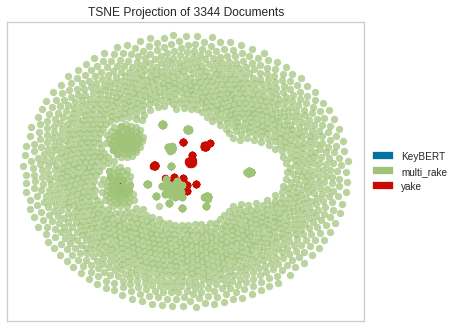

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

from yellowbrick.text import TSNEVisualizer


# Load the data and create document vectors
# corpus = df_all['sentence_from_keyword']
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df_all['sentence_from_keyword'])
y = df_all['keyword']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()

In [ ]:
'keyword','sentence_from_keyword','type_of_law'

('keyword', 'sentence_from_keyword', 'type_of_law')

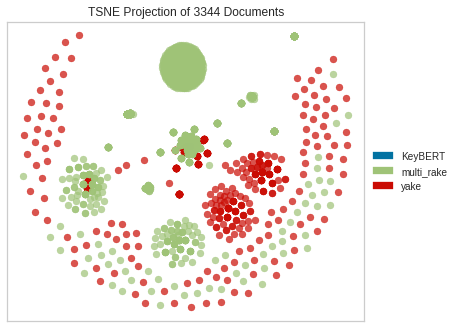

In [ ]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df_all['sentence_from_keyword'])
y = df_all['keyword']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(metrics='correlation')
tsne.fit(X, y)
tsne.show()

KeyBERT

In [ ]:
DF1=pd.read_csv("DF1.csv") #KeyBERT	
DF2=pd.read_csv("DF2.csv") #yake
DF3=pd.read_csv("DF3.csv") #MultiRake

In [ ]:
DF1['type_of_law'].value_counts()

prawo cywilne           2
prawo farmaceutyczne    2
prawo podatkowe         2
prawo medyczne          1
Name: type_of_law, dtype: int64

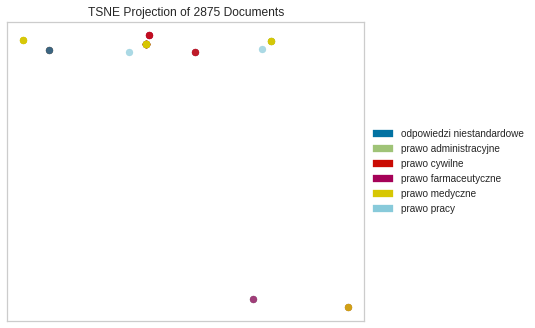

In [ ]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(DF3['sentence_from_keyword'])
y = df4['type_of_law']

# Create the visualizer and draw the vectors
tsne = TSNEVisualizer(metrics='correlation')
tsne.fit(X, y)
tsne.show()

In [ ]:
from sklearn import manifold
import seaborn as sns 

X = tfidf.fit_transform(DF1['sentence_from_keyword'])
y = DF1['type_of_law']

tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(X)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


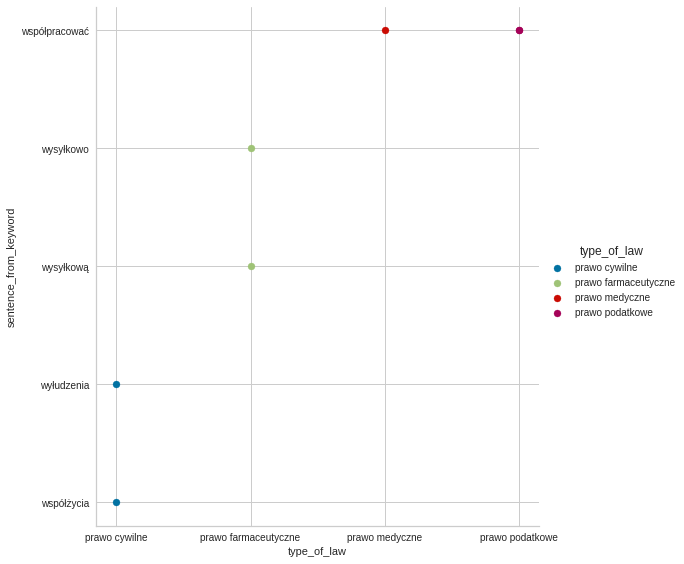

In [ ]:
grid = sns.FacetGrid(DF1, hue="type_of_law", size=8)
grid.map(plt.scatter,'type_of_law','sentence_from_keyword').add_legend()

In [ ]:
from sklearn import manifold
import seaborn as sns 

X = tfidf.fit_transform(DF2['sentence_from_keyword'])
y = DF2['type_of_law']

tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


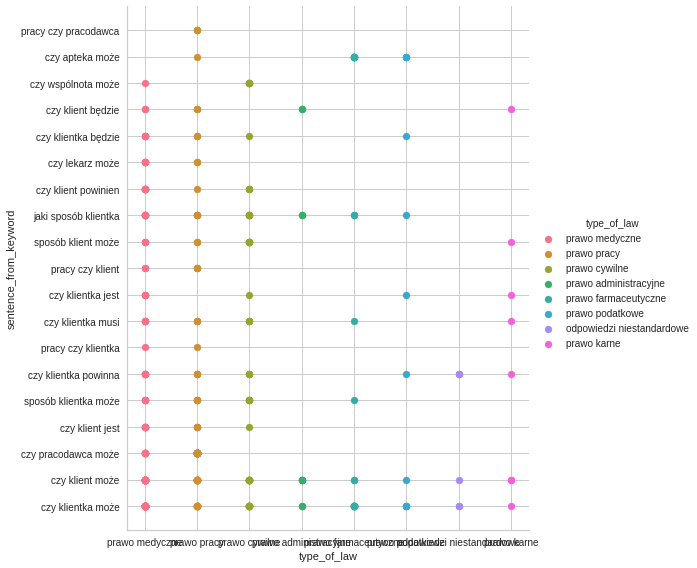

In [ ]:
grid = sns.FacetGrid(DF2, hue="type_of_law", size=8)
grid.map(plt.scatter,'type_of_law','sentence_from_keyword').add_legend()

In [ ]:
from sklearn import manifold
import seaborn as sns 

X = tfidf.fit_transform(df4['sentence_from_keyword'])
y = df4['type_of_law']

tsne = manifold.TSNE(n_components=2, random_state=42)
# fit and transform
mnist_tr = tsne.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


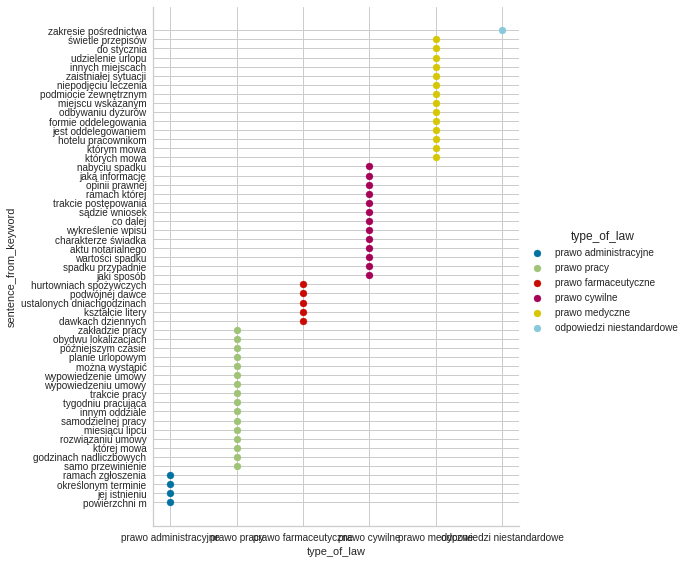

In [ ]:
grid = sns.FacetGrid(df4, hue="type_of_law", size=8)
grid.map(plt.scatter,'type_of_law','sentence_from_keyword').add_legend()

In [ ]:
#nowe wyswietlanie bez nazwy keyworda:


In [ ]:

DF1.drop('keyword',axis=1,inplace=True)
DF2.drop('keyword',axis=1,inplace=True)
DF3.drop('keyword',axis=1,inplace=True)

In [ ]:
#Keybert 

DF1.head()

,sentence_from_keyword,type_of_law,weights
0,współżycia,prawo cywilne,0.5197
1,wysyłkową,prawo farmaceutyczne,0.4852
2,wyłudzenia,prawo cywilne,0.4832
3,współpracować,prawo medyczne,0.4832
4,współpracować,prawo podatkowe,0.4832


In [ ]:
#yake 

DF2.head()

,sentence_from_keyword,type_of_law,weights
0,czy klientka może,prawo medyczne,2.333206e-09
1,czy klientka może,prawo pracy,2.333206e-09
2,czy klientka może,prawo medyczne,2.333206e-09
3,czy klientka może,prawo medyczne,2.333206e-09
4,czy klientka może,prawo medyczne,2.333206e-09


In [ ]:
#MultiRake 

DF3.head()

,sentence_from_keyword,type_of_law,weights
0,powierzchni m,prawo administracyjne,4.0
1,samo przewinienie,prawo pracy,4.0
2,dawkach dziennych,prawo farmaceutyczne,4.0
3,godzinach nadliczbowych,prawo pracy,4.0
4,godzinach nadliczbowych,prawo pracy,4.0
